In [2]:
import numpy as np
import pandas as pd


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df=pd.read_csv('coursera data.csv')
df.head(4)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k


In [36]:
df.shape

(891, 7)

In [37]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [38]:
df.nunique()

Unnamed: 0                  891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

## 3) which course title has maximum number of students

In [22]:
df.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [55]:
df.head(3)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k


In [125]:
df['course_students_enrolled']=df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [94]:
df.head(2)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000


In [72]:
df.head(2)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000


In [75]:
df_new=df.groupby(['course_title']).sum().nlargest(1,'course_students_enrolled')

In [110]:
df_new

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000
12,43,AWS Fundamentals,Amazon Web Services,SPECIALIZATION,4.6,Beginner,130000
...,...,...,...,...,...,...,...
877,492,Искусство ведения бизнеса,Saint Petersburg State University,SPECIALIZATION,4.6,Beginner,14000
879,722,Корпоративные финансы и стоимость компании,National Research University Higher School of ...,SPECIALIZATION,4.5,Beginner,16000
880,811,Математика и Python для анализа данных,E-Learning Development Fund,COURSE,4.8,Beginner,67000
883,703,Основы программирования на Python,National Research University Higher School of ...,COURSE,4.6,Beginner,83000


## 4) Which organisation has maximum no of students

In [79]:
df_new=df.groupby(['course_organization']).sum().nlargest(1,'course_students_enrolled')

In [81]:
df_new

,Unnamed: 0,course_rating,course_students_enrolled
course_organization,,,
University of Michigan,16714,193.9,7437700


In [126]:
df_new=df[df.loc[:,'course_difficulty']=='Beginner']
#df[df['Product_Type'] == 'Historical'])

In [117]:
df_new.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000
12,43,AWS Fundamentals,Amazon Web Services,SPECIALIZATION,4.6,Beginner,130000


In [102]:
df_new.nunique()

Unnamed: 0                  487
course_title                486
course_organization         125
course_Certificate_type       3
course_rating                10
course_difficulty             1
course_students_enrolled    168
dtype: int64

In [134]:
df_new.nlargest(1,'course_students_enrolled')

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
688,3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000


In [138]:
df_new.nlargest(10,'course_rating')

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
36,846,Agile и Scrum в работе над проектами и продуктами,ScrumTrek,COURSE,4.9,Beginner,12000
40,322,American Contract Law I,Yale University,COURSE,4.9,Beginner,18000
61,551,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.9,Beginner,180000
65,56,Arizona State University TESOL,Arizona State University,PROFESSIONAL CERTIFICATE,4.9,Beginner,150000
70,877,Aspectos básicos de la planificación y la gest...,University of Virginia,COURSE,4.9,Beginner,10000
98,645,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9500
99,72,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.9,Beginner,57000
102,688,Bugs 101: Insect-Human Interactions,University of Alberta,COURSE,4.9,Beginner,15000
124,21,COVID-19 Contact Tracing,Johns Hopkins University,COURSE,4.9,Beginner,220000


## Relation between 'course_difficulty','course_students_enrolled'

In [141]:
df_relation=df[['course_difficulty','course_students_enrolled']]

In [143]:
df_relation.head(4)

,course_difficulty,course_students_enrolled
0,Beginner,5300
1,Intermediate,17000
2,Mixed,130000
3,Mixed,91000


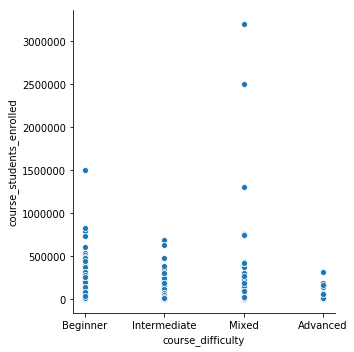

In [146]:
import seaborn as sns
sns.relplot(x='course_difficulty',y='course_students_enrolled',data=df_relation,kind='scatter')

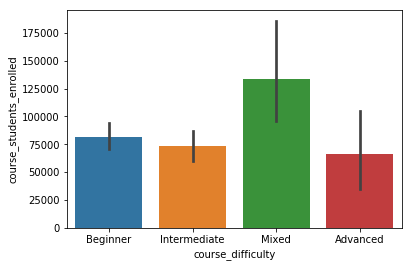

In [149]:
sns.barplot(x='course_difficulty',y='course_students_enrolled',data=df_relation)

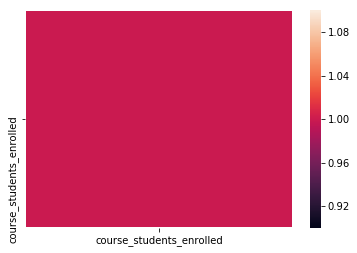

In [150]:
df_corr = df_relation[['course_difficulty','course_students_enrolled']]
sns.heatmap(df_corr.corr(),linewidth=1.0)